<a href="https://colab.research.google.com/github/hfarruda/deeplearningtutorial/blob/master/deepLearningCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Convolutional Neural Network (CNN)

This tutorial is the second example of deep learning implementation, in which we exemplify a classification task. More specifically, we considered ten classes of colored pictures. 

First of all, we import the necessary libraries. Here we opt for using Keras (using TensorFlow backend).

In [0]:
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.datasets import cifar10
from keras.utils.vis_utils import plot_model
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

Using TensorFlow backend.


If you have a GPU, you can use the following code to allocate processing into it.  Otherwise, proceed to (*).

In [0]:
import tensorflow as tf 
from keras import backend as K

print(K.tensorflow_backend._get_available_gpus())

number_of_cpu_cores = 8
config = tf.ConfigProto(device_count = {'GPU': 1 , 'CPU': number_of_cpu_cores}) 
session = tf.Session(config=config) 
keras.backend.set_session(session)

W0828 00:56:06.176350 139670588204928 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0828 00:56:06.179314 139670588204928 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0828 00:56:06.180896 139670588204928 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:186: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W0828 00:56:07.429881 139670588204928 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:190: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



['/job:localhost/replica:0/task:0/device:GPU:0']


(*) In this example, we used the CIFAR10, which is consists of a colored dataset of images. It is available in Keras library, available on [keras-datasets](https://keras.io/datasets/).
This dataset is organized into two parts, where the first is called x_train/x_test and is comprises RGB images with dimensions of 32x32x3 . The second represents the targets, and the variables are called y_train/y_test, which are represented by arrays of category tags from 0 to 9.

The following command is used to load the data set.

In [0]:
(train_data, train_target), (test_data, test_target) = cifar10.load_data()

train_target_one_hot_encoding = np_utils.to_categorical(train_target)

170500096/170498071 [==============================] - 14s 0us/step


In order to visualize a given figure, the following code can be executed.

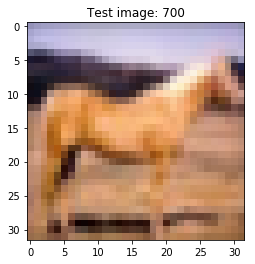

In [0]:
image_id = 700
plt.imshow(test_data[image_id])
plt.title("Test image: " + str(image_id))
plt.show()

In the following, we define the network topology. Note that in this case we do not employ dropout.

In [0]:
input_shape = train_data.shape[1::]
filters = 128
kernel_size = (3,3)
pool_size = (2,2)

optimizer = 'adam'
loss = 'categorical_crossentropy'
metrics = ['categorical_accuracy']
activation = 'relu'
activation_function_output = 'softmax'
number_of_cnn_layers = 3
number_of_ff_layers = 3
number_of_units_output = train_target_one_hot_encoding.shape[1]

cnn_model = Sequential()
cnn_model.add(Conv2D(filters, kernel_size, input_shape = input_shape, 
                     activation = activation))

cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size = pool_size))

for i in range(number_of_cnn_layers-1):
  cnn_model.add(Conv2D(filters, kernel_size, input_shape = input_shape[0:2], 
                       activation = activation))
  cnn_model.add(BatchNormalization())
  cnn_model.add(MaxPooling2D(pool_size = pool_size))

cnn_model.add(Flatten())

#Feedforward network
for i in range(number_of_ff_layers):
  cnn_model.add(Dense(units = 128, activation = activation))
  cnn_model.add(Dropout(0.3))

cnn_model.add(Dense(units = number_of_units_output, 
                    activation = activation_function_output))

cnn_model.compile(optimizer = optimizer, loss = loss, metrics = metrics)

W0828 00:56:24.954105 139670588204928 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0828 00:56:25.010998 139670588204928 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.

W0828 00:56:25.076863 139670588204928 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0828 00:56:25.245029 139670588204928 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instr

We can use the following command to see the network topology.


In [0]:
cnn_model.summary()
#Saving the resultant figure as 'cnn_model.png'.
plot_model(cnn_model, to_file='cnn_model.png', show_shapes=True, 
           show_layer_names=True)

The training step is executed as follows. Because this network demands a high computational power, the variable epochs can receive a smaller number (e.g., 5).

In [0]:
batch_size = 30
epochs = 50

cnn_model.fit(train_data, train_target_one_hot_encoding, 
              batch_size = batch_size, epochs = epochs)

Epoch 1/50
50000/50000 [==============================] - 15s 298us/step - loss: 0.8595 - categorical_accuracy: 0.7125
Epoch 2/50
50000/50000 [==============================] - 15s 294us/step - loss: 0.7888 - categorical_accuracy: 0.7387
Epoch 3/50
50000/50000 [==============================] - 15s 297us/step - loss: 0.7269 - categorical_accuracy: 0.7592
Epoch 4/50
50000/50000 [==============================] - 15s 295us/step - loss: 0.6738 - categorical_accuracy: 0.7792
Epoch 5/50
50000/50000 [==============================] - 15s 296us/step - loss: 0.6247 - categorical_accuracy: 0.7928
Epoch 6/50
50000/50000 [==============================] - 15s 297us/step - loss: 0.5816 - categorical_accuracy: 0.8085
Epoch 7/50
50000/50000 [==============================] - 15s 295us/step - loss: 0.5424 - categorical_accuracy: 0.8226
Epoch 8/50
50000/50000 [==============================] - 15s 296us/step - loss: 0.5121 - categorical_accuracy: 0.8333
Epoch 9/50
50000/50000 [========================

Because there are three classes, we show the classification results through a confusion matrix.

Accuracy = 0.7563
Confusion matrix:


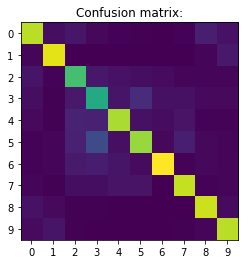

In [0]:
predictions = cnn_model.predict(test_data)
found_target = predictions.argmax(axis=1)

accuracy = accuracy_score(test_target, found_target)
print("Accuracy =", accuracy)

print("Confusion matrix:")
matrix = confusion_matrix(found_target,test_target)

plt.title("Confusion matrix:")
plt.xticks(np.linspace(0,9,10))
plt.yticks(np.linspace(0,9,10))
plt.imshow(matrix)
plt.show()